In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [123]:
project = pd.read_csv('predict_consume_최종.csv', encoding='euc-kr')
project

,년도,귤도매가격,귤소매가격,오렌지도매가격,오렌지소매가격,생산자물가지수(감귤),소비자물가지수(감귤),1인당 가처분소득,1인당 연간소비량(kg),오렌지가격_1kg,오렌지가공매출_백만원,오렌지가공량_ton,감귤가격_1kg,감귤가공매출_백만원,인구수,감귤가공량_ton,감귤처리량
0,1998,10884.666670,11929.333330,21830.00000,45000.0,95.98,80.644,57194.3727,NaN,2310,NaN,13836.0,1326,NaN,46286503,5012,500000
1,1999,6206.000000,11933.333330,30530.00000,93240.0,113.29,102.156,58382.7420,NaN,3202,NaN,15070.0,1512,NaN,46616677,33142,567041
2,2000,7417.333333,11800.000000,14240.00000,52580.0,58.74,55.410,61964.6448,11.9,1538,188000.0,11375.0,936,NaN,47008111,27468,430617
3,2001,6356.000000,11066.666670,17780.00000,51290.0,90.97,79.033,68150.2896,NaN,1898,NaN,10869.0,1194,NaN,47370164,47445,527326
4,2002,5312.000000,8866.666667,22410.00000,63440.0,84.83,84.325,75338.7816,13.3,2390,NaN,8229.0,1099,NaN,47644736,112359,531081
5,2003,9075.000000,26300.000000,17700.00000,56280.0,57.45,63.620,82105.3168,13.0,1904,NaN,19712.0,900,NaN,47892330,120333,477523
6,2004,12609.000000,27000.000000,18720.00000,58280.0,96.77,85.198,90825.8304,12.0,2006,NaN,24065.0,1337,NaN,48082519,100517,415338
7,2005,12133.000000,16500.000000,16700.00000,63520.0,143.35,106.735,95684.7528,13.1,1814,NaN,25366.0,1795,NaN,48184561,125343,491260
8,2006,13026.000000,31800.000000,18650.00000,63380.0,100.05,84.334,99341.6424,12.7,1998,NaN,26547.0,1426,NaN,48438292,109496,450087
9,2007,7101.000000,13100.000000,23090.00000,70610.0,157.50,109.137,107368.2552,16.0,2445,NaN,24101.0,1582,NaN,48683638,138782,513746


In [3]:
#project.iloc[:,14]
x_1 = project.drop(labels='감귤가공량_ton',axis=1)

In [124]:

x = x_1.iloc[:,9:15]
y = project.iloc[:,15]

In [125]:
x = x.fillna(np.mean(x))

In [126]:
x

,오렌지가격_1kg,오렌지가공매출_백만원,오렌지가공량_ton,감귤가격_1kg,감귤가공매출_백만원,인구수
0,2310,178410.7,13836.000000,1326,74175.111111,46286503
1,3202,178410.7,15070.000000,1512,74175.111111,46616677
2,1538,188000.0,11375.000000,936,74175.111111,47008111
3,1898,178410.7,10869.000000,1194,74175.111111,47370164
4,2390,178410.7,8229.000000,1099,74175.111111,47644736
5,1904,178410.7,19712.000000,900,74175.111111,47892330
6,2006,178410.7,24065.000000,1337,74175.111111,48082519
7,1814,178410.7,25366.000000,1795,74175.111111,48184561
8,1998,178410.7,26547.000000,1426,74175.111111,48438292
9,2445,178410.7,24101.000000,1582,74175.111111,48683638


In [127]:
y

0       5012
1      33142
2      27468
3      47445
4     112359
5     120333
6     100517
7     125343
8     109496
9     138782
10     88664
11    123551
12     81117
13    102899
14     55814
15     92834
16    158371
17     84679
18     56372
19     72460
20     63402
21     60425
Name: 감귤가공량_ton, dtype: int64

In [307]:
pro2 = project.fillna(np.mean(project))

In [15]:
#model.fit(pro2_x,pro2_y)
logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(x,y)

print('정확도:%.2f'%(logreg.score(x,y)*100),"%")

정확도:31.82 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

In [309]:
pro2.head()
pro2_x = pro2.iloc[:,:15]
pro2_y = pro2.iloc[:,15]

In [194]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


0     500000
13    371826
8     450087
1     567041
15    433650
Name: 감귤처리량, dtype: int64

In [57]:
model = LogisticRegression(solver='lbfgs',max_iter=20)
#model.fit(pro2_x,pro2_y)
logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(pro2_x,pro2_y)

print('정확도:%.2f'%(logreg.score(pro2_x,pro2_y)*100),"%")

정확도:100.00 %


C:\Users\82105\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\82105\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\82105\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\82105\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\82105\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

In [16]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x,y)

# y_pred = model.predict(x_test)

# print('RandomForestClassifier test 정확도:%.2f'%(model_score(pro2_x,pro2_y)*100),"%")


features = pd.Series(model.feature_importances_,
                    index=x.columns).sort_values(ascending=False)
print(features)

인구수            0.206221
오렌지가격_1kg      0.199291
오렌지가공량_ton     0.197154
감귤가격_1kg       0.191861
오렌지가공매출_백만원    0.107209
감귤가공매출_백만원     0.098264
dtype: float64


In [17]:
model = RandomForestRegressor(n_estimators=100, bootstrap=True, criterion='mse', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features='auto')
model.fit(x, y)

print('RandomForest test 정확도:%.2f'%(model.score(x, y)*100),"%")

RandomForest test 정확도:90.58 %


In [18]:
# MinMaxScaler + LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x)

logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaled_data,y)

print('정확도:%.2f'%(logreg.score(scaled_data,y)*100),"%")

정확도:54.55 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [19]:
# Random
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x)

randomF= RandomForestRegressor(n_estimators=100,max_depth =3,min_samples_leaf=1).fit(scaled_data,y)

print('정확도:%.2f'%(randomF.score(scaled_data,y)*100),"%")

정확도:85.81 %


In [20]:

# z점수
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale, robust_scale, minmax_scale , maxabs_scale
scaler = scale(x)

#scaled_data = scale.fit(x)

logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaler,y)

print("Logi.Regre Z점수 정확도:%.2f" %(logreg.score(scaler,y)*100),"%")
#
scaler = maxabs_scale(x)

#scaled_data = scale.fit(x)

logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaler,y)

print('Logi.Regre maxabs점수 정확도:%.2f'%(logreg.score(scaler,y)*100),"%")
#
scaler = minmax_scale(x)

#scaled_data = scale.fit(x)

logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaler,y)

print('Logi.Regre minmax점수 정확도:%.2f'%(logreg.score(scaler,y)*100),"%")
#
scaler = robust_scale(x)

#scaled_data = scale.fit(x)

logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaler,y)

print('Logi.Regre robust점수 정확도:%.2f'%(logreg.score(scaler,y)*100),"%")

Logi.Regre Z점수 정확도:90.91 %
Logi.Regre maxabs점수 정확도:45.45 %
Logi.Regre minmax점수 정확도:54.55 %
Logi.Regre robust점수 정확도:13.64 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa

In [21]:
scaler = scale(x)
logreg= LogisticRegression(solver='lbfgs',max_iter=20).fit(scaler,y)

print("Logi.Regre Z점수 정확도:%.2f" %(logreg.score(scaler,y)*100),"%")

print(logreg.coef_,'\n\n\n', logreg.intercept_)


Logi.Regre Z점수 정확도:90.91 %
[[ 5.13689715e-02 -5.87510316e-02 -3.78717042e-01  7.05550325e-03
  -1.98967481e-02 -8.36241207e-01]
 [-8.72140126e-01  2.48816690e-01 -4.30655618e-01 -4.75529116e-01
  -2.63743388e-02 -3.47195664e-01]
 [ 1.03575156e+00  9.96902062e-03 -4.22952288e-01  8.31490207e-02
  -1.41446574e-02 -6.64030025e-01]
 [-4.17621748e-01 -7.98129962e-02 -6.19742802e-01 -1.20028853e-01
   7.11904370e-04 -2.68673186e-01]
 [ 5.84118137e-02 -7.62812799e-02  1.58831228e-01  7.53838012e-01
   9.03436937e-01  7.99230303e-02]
 [ 1.16956179e-01  1.84824370e-01  3.27041658e-01  2.56972107e-01
  -5.78002574e-01  3.91185725e-01]
 [ 1.86644851e-01 -9.49381943e-01 -1.47734179e-01 -4.12331112e-01
  -2.11580688e-01  5.50294893e-01]
 [ 2.76031538e-01 -6.81499689e-01 -8.84119365e-02  3.52261392e-01
  -4.05188694e-01  3.92962476e-01]
 [ 6.77357649e-02 -2.75426138e-01  2.66221804e-01  8.84054626e-01
  -5.20312717e-01  2.52308981e-01]
 [ 5.00241473e-01 -1.18338868e-02  2.58942983e-01 -3.65731041e-0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [22]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =123)

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import scale, robust_scale, minmax_scale , maxabs_scale

scaler = scale(x)

RandomF= RandomForestRegressor(n_estimators = 100, random_state=42).fit(scaler,y)

print('RF/ Z_점수 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########


RF/ Z_점수 정확도:89.51 %


In [381]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state = 42)

In [389]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x.shape

(17, 6)
(11,)
(17,)
(11,)


(22, 6)

In [23]:

# Random forest scale
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import scale, robust_scale, minmax_scale , maxabs_scale
scaler = scale(x)

RandomF= RandomForestRegressor(n_estimators = 100, random_state=42).fit(scaler,y)

print('RF/ Z_점수 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########
scaler = robust_scale(x)

RandomF= RandomForestRegressor(n_estimators = 100, random_state=42).fit(scaler,y)

print('RF/ robust 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########
scaler = minmax_scale(x)

RandomF= RandomForestRegressor(n_estimators = 100, random_state=42).fit(scaler,y)

print('RF/ minmax 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########
scaler = maxabs_scale(x)

RandomF= RandomForestRegressor(n_estimators = 100, random_state=42).fit(scaler,y)

print('RF/ maxabs 정확도:%.2f'%(RandomF.score(scaler,y)*100),"%")
###########

RF/ Z_점수 정확도:89.51 %
RF/ robust 정확도:89.51 %
RF/ minmax 정확도:89.51 %
RF/ maxabs 정확도:89.51 %


In [342]:
import xgboost as xgb
from xgboost import XGBRegressor

In [185]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import LinearSVR

In [186]:
models = {
    'SVM':LinearSVR(epsilon=1.5,random_state=42),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100)
}

cv = KFold(n_splits=5, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=cv)
    print('%s: %.2f%%'% (name, np.mean(scores)*100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

SVM: -1700.40%
DecisionTreeRegressor: -2907.46%
KNeighborsRegressor: -442.04%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression: 0.00%
RandomForestRegressor: -1200.20%


In [230]:
models = {
    'SVM':svm.SVC(gamma='scale'),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5, random_state=42)
y_pred = model.predict(X_test)

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print('%s: %.2f%%'% (name, np.mean(scores)*100))
    print('%s: %.2f'%(name,metrics.accuracy_score(y_pred, y_test)*100),"%")

SVM: 0.00%
SVM: 0.00 %
DecisionTreeClassifier: 0.00%
DecisionTreeClassifier: 0.00 %
KNeighborsClassifier: 0.00%
KNeighborsClassifier: 0.00 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pa

LogisticRegression: 0.00%
LogisticRegression: 0.00 %
RandomForestClassifier: 0.00%
RandomForestClassifier: 0.00 %


In [24]:
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('SVM 정확도:%.2f'%(metrics.accuracy_score(y_pred, y_test)*100),"%")

SVM 정확도:0.00 %


In [59]:
project


,년도,귤도매가격,귤소매가격,오렌지도매가격,오렌지소매가격,생산자물가지수(감귤),소비자물가지수(감귤),1인당 가처분소득,1인당 연간소비량(kg),오렌지가격_1kg,오렌지가공매출_백만원,오렌지가공량_ton,감귤가격_1kg,감귤가공매출_백만원,인구수,감귤가공량_ton,감귤처리량
0,1998,10884.666670,11929.333330,21830.00000,45000.0,95.98,80.644,57194.3727,NaN,2310,NaN,13836.0,1326,NaN,46286503,5012,500000
1,1999,6206.000000,11933.333330,30530.00000,93240.0,113.29,102.156,58382.7420,NaN,3202,NaN,15070.0,1512,NaN,46616677,33142,567041
2,2000,7417.333333,11800.000000,14240.00000,52580.0,58.74,55.410,61964.6448,11.9,1538,188000.0,11375.0,936,NaN,47008111,27468,430617
3,2001,6356.000000,11066.666670,17780.00000,51290.0,90.97,79.033,68150.2896,NaN,1898,NaN,10869.0,1194,NaN,47370164,47445,527326
4,2002,5312.000000,8866.666667,22410.00000,63440.0,84.83,84.325,75338.7816,13.3,2390,NaN,8229.0,1099,NaN,47644736,112359,531081
5,2003,9075.000000,26300.000000,17700.00000,56280.0,57.45,63.620,82105.3168,13.0,1904,NaN,19712.0,900,NaN,47892330,120333,477523
6,2004,12609.000000,27000.000000,18720.00000,58280.0,96.77,85.198,90825.8304,12.0,2006,NaN,24065.0,1337,NaN,48082519,100517,415338
7,2005,12133.000000,16500.000000,16700.00000,63520.0,143.35,106.735,95684.7528,13.1,1814,NaN,25366.0,1795,NaN,48184561,125343,491260
8,2006,13026.000000,31800.000000,18650.00000,63380.0,100.05,84.334,99341.6424,12.7,1998,NaN,26547.0,1426,NaN,48438292,109496,450087
9,2007,7101.000000,13100.000000,23090.00000,70610.0,157.50,109.137,107368.2552,16.0,2445,NaN,24101.0,1582,NaN,48683638,138782,513746


In [74]:
# FONT 깨질때 폰트깨질때
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)
graph1_x = project.iloc[:,:1]
graph1_y = project.loc[:,"감귤가공량_ton"]
graph1_z = project.loc[:,"감귤처리량"]

In [89]:


graph1_x = np.arange(1998,2020)

In [90]:
graph1_x

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

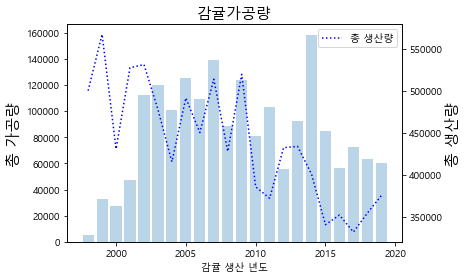

In [96]:
%matplotlib inline

fig, ax0 =plt.subplots()
ax1 = ax0.twinx()
font1 = {'size' :15, 'color':'black'}
font2 = {'size' :15, 'color':'black'}
ax0.set_title("감귤가공량",fontdict=font1)
ax0.bar(graph1_x, graph1_y, alpha=.3)
ax0.set_ylabel("총 가공량",fontdict=font2)
ax0.grid(False)

ax1.plot(graph1_x,graph1_z,'b:')
ax1.set_ylabel("총 생산량",fontdict=font2)
ax1.grid(False)


ax0.set_xlabel("감귤 생산 년도")
plt.legend(['총 생산량'])

In [97]:
project

,년도,귤도매가격,귤소매가격,오렌지도매가격,오렌지소매가격,생산자물가지수(감귤),소비자물가지수(감귤),1인당 가처분소득,1인당 연간소비량(kg),오렌지가격_1kg,오렌지가공매출_백만원,오렌지가공량_ton,감귤가격_1kg,감귤가공매출_백만원,인구수,감귤가공량_ton,감귤처리량
0,1998,10884.666670,11929.333330,21830.00000,45000.0,95.98,80.644,57194.3727,NaN,2310,NaN,13836.0,1326,NaN,46286503,5012,500000
1,1999,6206.000000,11933.333330,30530.00000,93240.0,113.29,102.156,58382.7420,NaN,3202,NaN,15070.0,1512,NaN,46616677,33142,567041
2,2000,7417.333333,11800.000000,14240.00000,52580.0,58.74,55.410,61964.6448,11.9,1538,188000.0,11375.0,936,NaN,47008111,27468,430617
3,2001,6356.000000,11066.666670,17780.00000,51290.0,90.97,79.033,68150.2896,NaN,1898,NaN,10869.0,1194,NaN,47370164,47445,527326
4,2002,5312.000000,8866.666667,22410.00000,63440.0,84.83,84.325,75338.7816,13.3,2390,NaN,8229.0,1099,NaN,47644736,112359,531081
5,2003,9075.000000,26300.000000,17700.00000,56280.0,57.45,63.620,82105.3168,13.0,1904,NaN,19712.0,900,NaN,47892330,120333,477523
6,2004,12609.000000,27000.000000,18720.00000,58280.0,96.77,85.198,90825.8304,12.0,2006,NaN,24065.0,1337,NaN,48082519,100517,415338
7,2005,12133.000000,16500.000000,16700.00000,63520.0,143.35,106.735,95684.7528,13.1,1814,NaN,25366.0,1795,NaN,48184561,125343,491260
8,2006,13026.000000,31800.000000,18650.00000,63380.0,100.05,84.334,99341.6424,12.7,1998,NaN,26547.0,1426,NaN,48438292,109496,450087
9,2007,7101.000000,13100.000000,23090.00000,70610.0,157.50,109.137,107368.2552,16.0,2445,NaN,24101.0,1582,NaN,48683638,138782,513746


In [101]:
project1 = project.fillna(np.mean(project))
graph1_x1 = np.arange(1998,2020)
graph1_y1 = project1.loc[:,"오렌지가공량_ton"]
graph1_z1 = project1.loc[:,"감귤가공량_ton"]

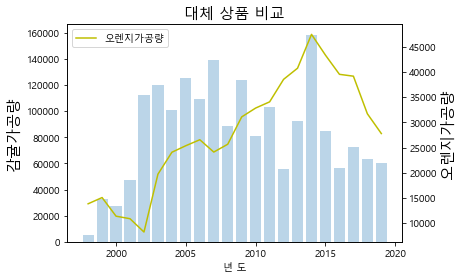

In [116]:
%matplotlib inline

fig, ax0 =plt.subplots()
ax1 = ax0.twinx()
font1 = {'size' :15, 'color':'black'}
font2 = {'size' :15, 'color':'black'}
ax0.set_title("대체 상품 비교",fontdict=font1)
ax0.bar(graph1_x1, graph1_z1, alpha=.3)
ax0.set_ylabel("감귤가공량",fontdict=font2)
ax0.grid(False)

ax1.plot(graph1_x1,graph1_y1,'y-')
ax1.set_ylabel("오렌지가공량",fontdict=font2)
ax1.grid(False)


ax0.set_xlabel("년 도")
plt.legend(['오렌지가공량'])

In [119]:
project1.corr().loc[:,'감귤가공량_ton']

년도               0.186885
 귤도매가격          -0.045533
귤소매가격            0.168501
오렌지도매가격         -0.060041
오렌지소매가격          0.111330
생산자물가지수(감귤)     -0.072081
소비자물가지수(감귤)     -0.032640
1인당 가처분소득        0.172744
1인당 연간소비량(kg)    0.514431
오렌지가격_1kg       -0.068291
오렌지가공매출_백만원      0.207786
오렌지가공량_ton       0.330793
감귤가격_1kg        -0.038335
감귤가공매출_백만원       0.028130
인구수              0.202650
감귤가공량_ton        1.000000
감귤처리량            0.039523
Name: 감귤가공량_ton, dtype: float64

In [120]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [240]:
# 앙상블
from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

log_clf = LogisticRegression()
rnd_clf = RandomForestRegressor()
svm_clf = SVC()


voting_clf = VotingRegressor(estimators=[('lr', log_clf),('rf',rnd_clf),('svc',svm_clf)], n_jobs=-1)
#VotingRegressor()
voting_clf.fit(x,y)

VotingRegressor(estimators=[('lr',
                             LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False)),
                            ('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_fe...
                                                   

In [259]:
#voting_clf.score(x,y)
# voting_clf.best_params_
print('정확도',round(voting_clf.score(x,y)*100,2),'%')
#voting_clf.get_params()

정확도 95.26 %


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


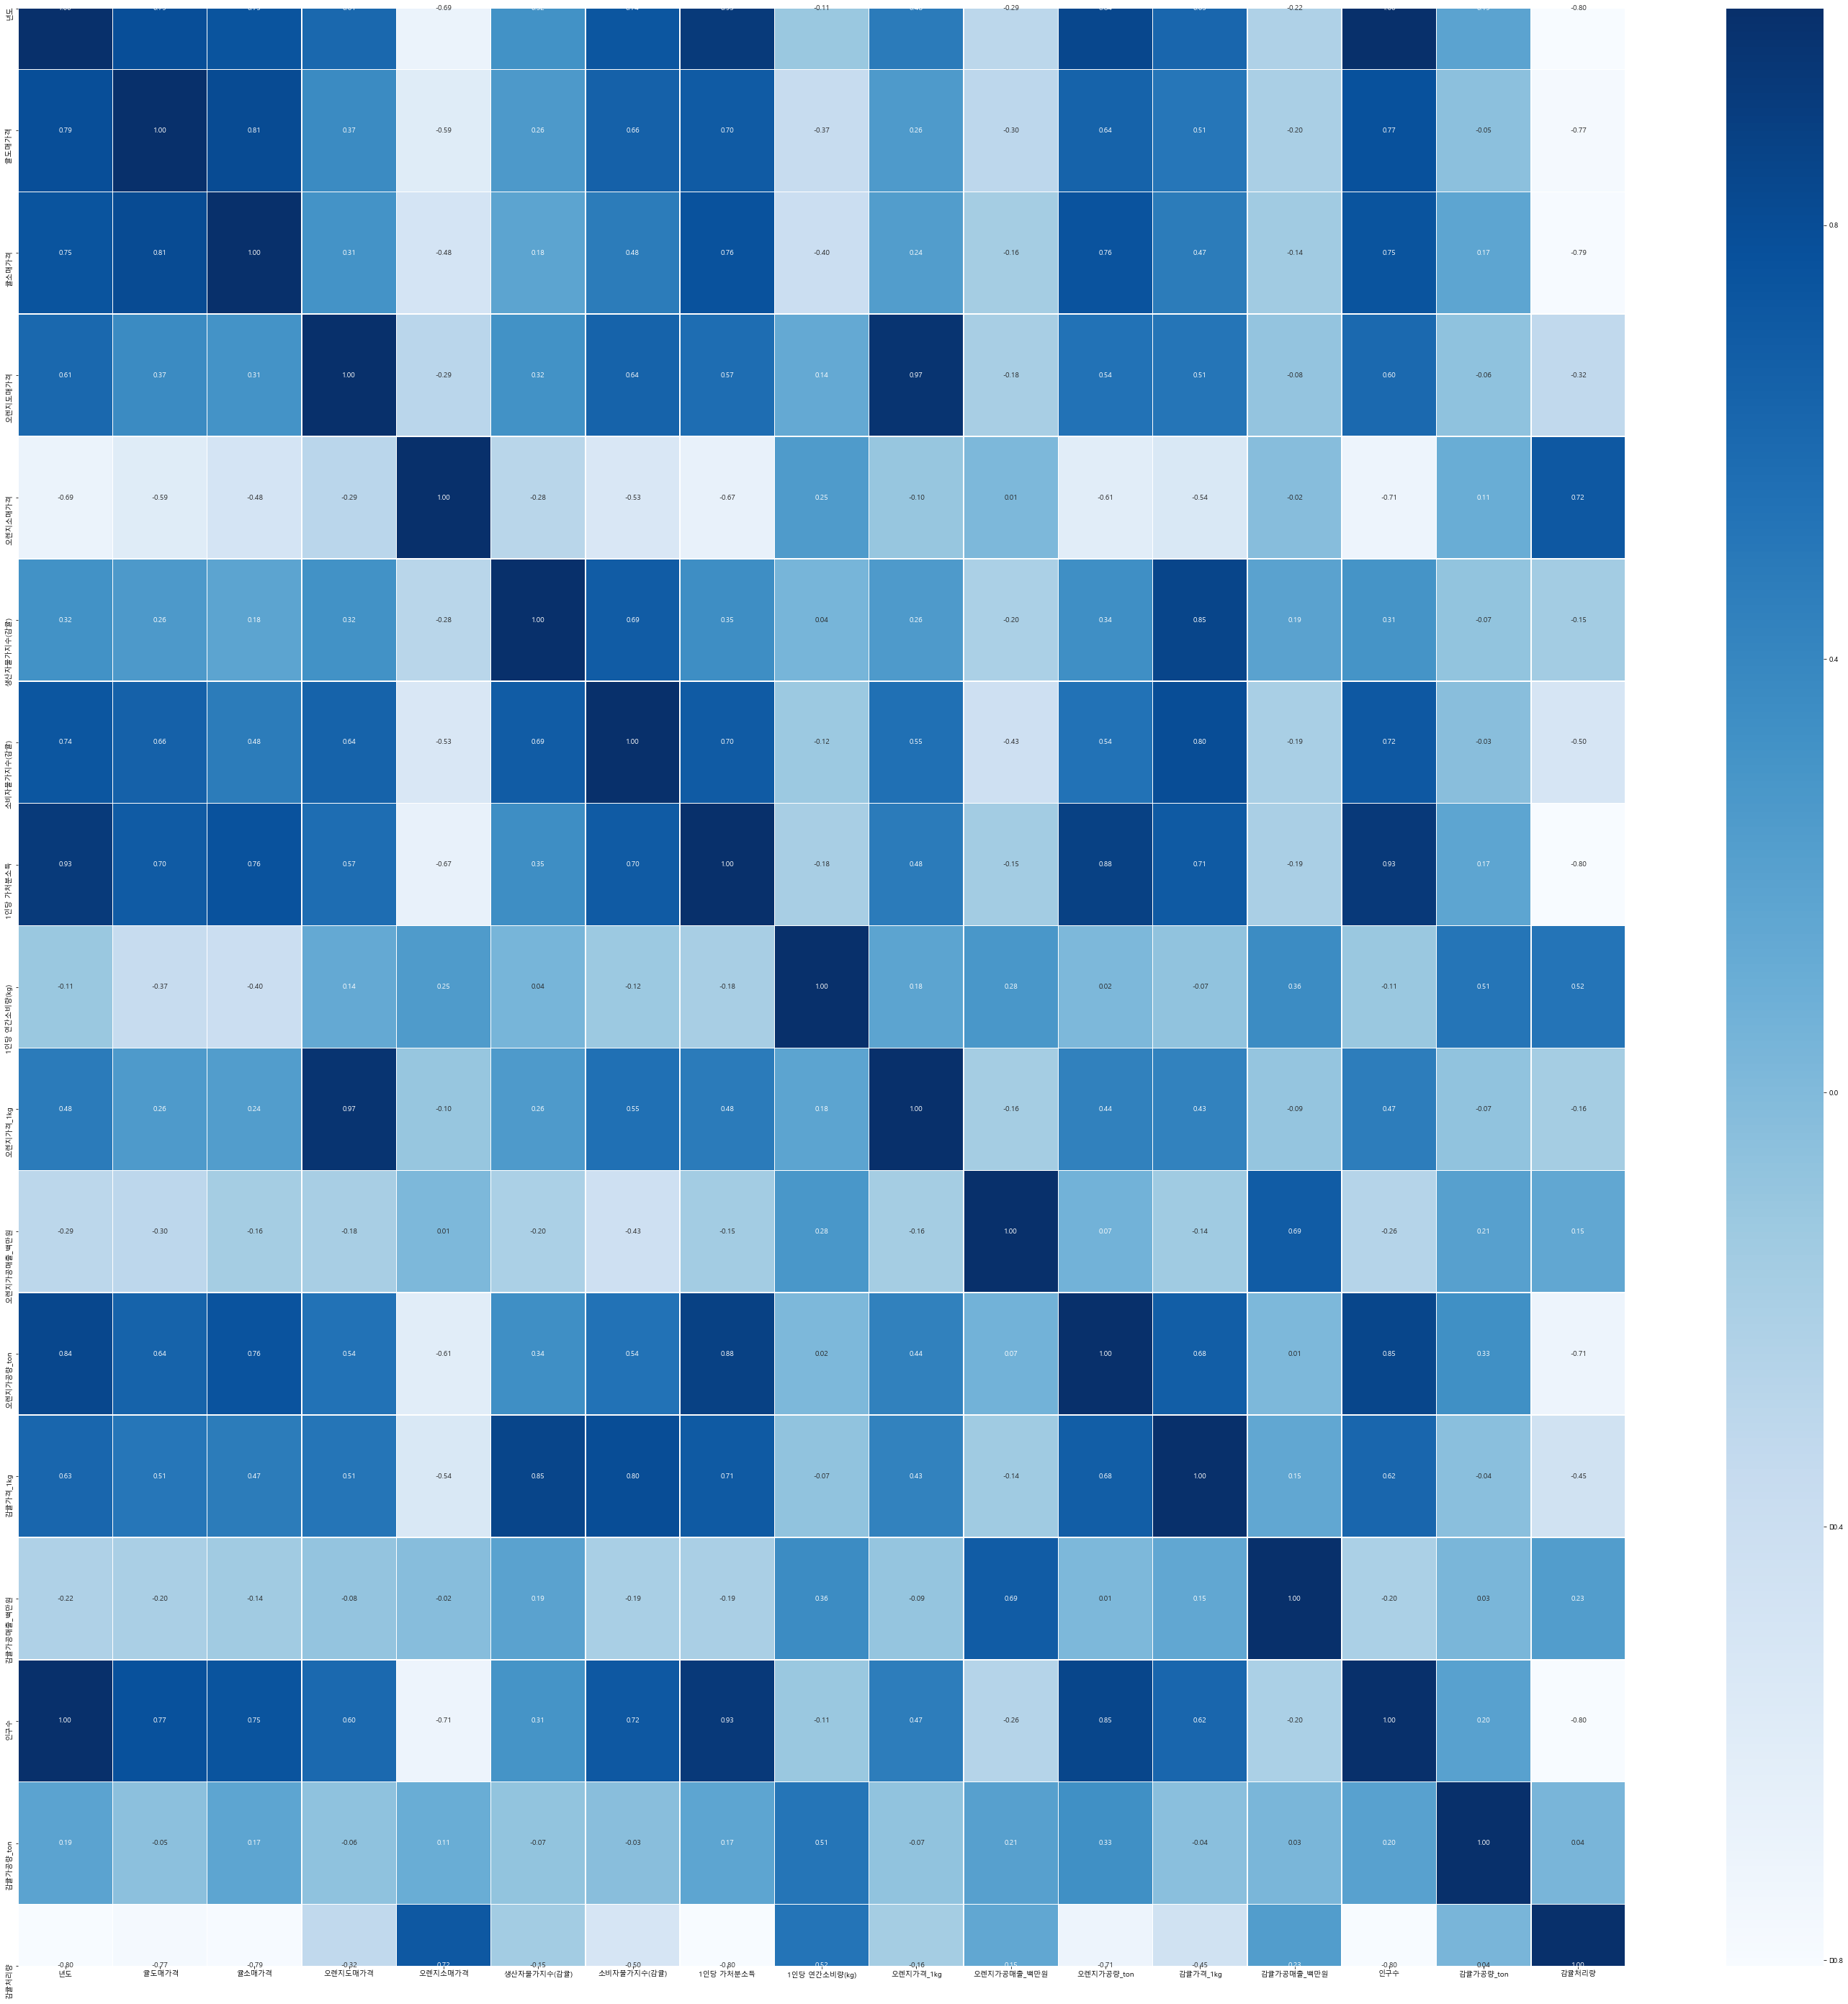

In [121]:
plt.figure(figsize=(50,50))
sns.heatmap(data=project1.corr(), annot=True,
           fmt = '.2f', linewidths=.5, cmap ='Blues')
plt.show()

In [234]:
# 과소적합, 과대적합 모델 확인 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size=0.2,random_state = 42,shuffle=True,)

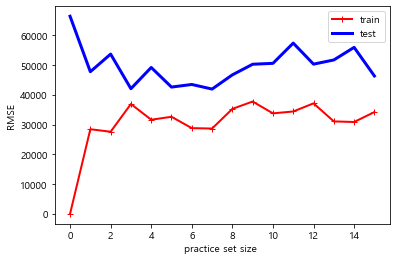

In [239]:
def plot_learning_curves(model, X, Y):

    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], Y_train[:m])
        Y_train_predict = model.predict(X_train[:m])
        Y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(Y_train[:m], Y_train_predict))
        val_errors.append(mean_squared_error(Y_val, Y_val_predict))#이 함수는 말그대로 평균 제곱 오차 회귀 손실이다.
    plt.plot(np.sqrt(train_errors), "r+-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")
    plt.legend(loc='upper right')
    plt.xlabel('practice set size ')
    plt.ylabel('RMSE')
    plt.show()

lin_reg = svm.SVR()
lin_rnd = RandomForestRegressor(n_estimators=3,min_samples_leaf=3)
plot_learning_curves(lin_rnd, x, y)
